# Titanic Classification

using Titanic Dataset, it is required to design different classifiers

# Load the Data

In [1]:
from math import nan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns


%matplotlib inline

In [2]:
titanic = pd.read_csv("datasets/train.csv")

# Take a Quick Look at the Data Structure

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.shape

(891, 12)

In [5]:
def expand_cab(x):
    x = str(x)

    if x == "nan":
        return nan

    cabins = x.split(" ")
    
    deck = sorted([cabin[0] for cabin in cabins])[0]

    rooms = sorted([cabin[1:] for cabin in cabins])[0]

    num_cabins = len(cabins)

    return {
        "deck": deck,
        "rooms": rooms,
        "num_cabins": num_cabins
    }


titanic[["cabin_highest_class_deck", "cabin_lowest_room_num", "cabin_num_cabins"]] = pd.json_normalize(titanic["Cabin"].map(expand_cab))
# titanic.drop(columns=["Cabin"], inplace=True)

In [6]:
titanic.isna().sum(axis=0).sort_values()

PassengerId                   0
Survived                      0
Pclass                        0
Name                          0
Sex                           0
SibSp                         0
Parch                         0
Ticket                        0
Fare                          0
Embarked                      2
Age                         177
Cabin                       687
cabin_highest_class_deck    687
cabin_lowest_room_num       687
cabin_num_cabins            687
dtype: int64

In [7]:
titanic = titanic[~titanic["Embarked"].isna()].reset_index()

In [8]:
titanic.isna().sum(axis=0).sort_values()

index                         0
PassengerId                   0
Survived                      0
Pclass                        0
Name                          0
Sex                           0
SibSp                         0
Parch                         0
Ticket                        0
Fare                          0
Embarked                      0
Age                         177
Cabin                       687
cabin_highest_class_deck    687
cabin_lowest_room_num       687
cabin_num_cabins            687
dtype: int64

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     889 non-null    int64  
 1   PassengerId               889 non-null    int64  
 2   Survived                  889 non-null    int64  
 3   Pclass                    889 non-null    int64  
 4   Name                      889 non-null    object 
 5   Sex                       889 non-null    object 
 6   Age                       712 non-null    float64
 7   SibSp                     889 non-null    int64  
 8   Parch                     889 non-null    int64  
 9   Ticket                    889 non-null    object 
 10  Fare                      889 non-null    float64
 11  Cabin                     202 non-null    object 
 12  Embarked                  889 non-null    object 
 13  cabin_highest_class_deck  202 non-null    object 
 14  cabin_lowe

In [10]:
titanic.describe()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_num_cabins
count,889.000000,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,202.000000
mean,445.000000,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681,1.168317
std,256.998173,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504,0.509986
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.000000,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,1.000000
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.000000,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,4.000000


In [11]:
titanic["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

## Encoding the categorical variables

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
def one_hot_encode(df: pd.DataFrame, col):
    enc = OneHotEncoder()

    enc.fit(df[[col]])

    enc_out = enc.transform(df[[col]])

    new_cols = [f"{col}_{cat}" for cat in enc.categories_[0]]

    print(new_cols)

    print(df.shape, enc_out.shape)

    # titanic["Embarked"] = emb_encoder.fit_transform(titanic["Embarked"])
    cat_df = pd.DataFrame(enc_out)#, columns=new_cols)

    return pd.concat([df, cat_df], axis=1), enc

# one_hot_encode(titanic, "Embarked")[0]


titanic["Embarked_S"] = titanic["Embarked"].map(lambda x: 1 if x == "S" else 0)
titanic["Embarked_C"] = titanic["Embarked"].map(lambda x: 1 if x == "C" else 0)
titanic["Embarked_Q"] = titanic["Embarked"].map(lambda x: 1 if x == "Q" else 0)

In [15]:
titanic

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_highest_class_deck,cabin_lowest_room_num,cabin_num_cabins,Embarked_S,Embarked_C,Embarked_Q
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,NaN,1,0,0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85,1.0,0,1,0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,1,0,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123,1.0,1,0,0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,NaN,NaN,1,0,0
885,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,42,1.0,1,0,0
886,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,NaN,1,0,0
887,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,148,1.0,0,1,0


In [16]:
# titanic, embarked_encoder = one_hot_encode(titanic, "Embarked")
# one_hot_encode(titanic, "Embarked")[0]
titanic["Sex"] = titanic["Sex"].map({"male":1, "female":0})

In [17]:
titanic

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_highest_class_deck,cabin_lowest_room_num,cabin_num_cabins,Embarked_S,Embarked_C,Embarked_Q
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,NaN,1,0,0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,85,1.0,0,1,0
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,1,0,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,123,1.0,1,0,0
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,NaN,NaN,NaN,1,0,0
885,887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,B,42,1.0,1,0,0
886,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,NaN,1,0,0
887,889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,C,148,1.0,0,1,0


The following function is used to save figures for the report

In [18]:
from pathlib import Path

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [19]:
# import matplotlib.pyplot as plt

# plt.rc('font', size=14)
# plt.rc('axes', labelsize=14, titlesize=14)
# plt.rc('legend', fontsize=14)
# plt.rc('xtick', labelsize=10)
# plt.rc('ytick', labelsize=10)

# titanic.hist(bins=50, figsize=(12, 8))
# save_fig("attribute_histogram_plots")  # extra code

# plt.show()

In [20]:
# pd.plotting.scatter_matrix(titanic[[c for c in titanic if "Embarked" not in c]], alpha=0.2, figsize=(15, 10), diagonal="kde")
plt.show()

## Looking for Correlations

In [21]:
corr_matrix = titanic.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False)

Survived            1.000000
Fare                0.255290
Embarked_C          0.169966
Parch               0.083151
Embarked_Q          0.004536
index              -0.005028
PassengerId        -0.005028
cabin_num_cabins   -0.032010
SibSp              -0.034040
Age                -0.082446
Embarked_S         -0.151777
Pclass             -0.335549
Sex                -0.541585
Name: Survived, dtype: float64

# Experimenting with Attribute Combinations

In [22]:
titanic["Family_Size"] = titanic["SibSp"] + titanic["Parch"] + 1

# bins = [0, 12, 18, 60, float("inf")]
# labels = ['Child', 'Teen', 'Adult', 'Senior']
# titanic["Age_Category"] = pd.cut(titanic["Age"], bins=bins, labels=labels)
# titanic["Is_Alone"] = (titanic["Family_Size"] == 1).astype(int)
titanic.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_highest_class_deck,cabin_lowest_room_num,cabin_num_cabins,Embarked_S,Embarked_C,Embarked_Q,Family_Size
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,NaN,1,0,0,2
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,85,1.0,0,1,0,2
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,1,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,123,1.0,1,0,0,2
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,NaN,1,0,0,1


# Prepare the Data for Machine Learning Algorithms

## Scaling Continuous Data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
titanic[["Age", "Fare", "Family_Size"]] = scaler.fit_transform(titanic[["Age", "Fare", "Family_Size"]])
titanic["cabin_lowest_room_num"] = titanic["cabin_lowest_room_num"].map(lambda x: x if x != "" else 0).astype(float)

## Cleaning the Data

In [24]:
titanic.info

<bound method DataFrame.info of      index  PassengerId  Survived  Pclass  \
0        0            1         0       3   
1        1            2         1       1   
2        2            3         1       3   
3        3            4         1       1   
4        4            5         0       3   
..     ...          ...       ...     ...   
884    886          887         0       2   
885    887          888         1       1   
886    888          889         0       3   
887    889          890         1       1   
888    890          891         0       3   

                                                  Name  Sex       Age  SibSp  \
0                              Braund, Mr. Owen Harris    1 -0.527669      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.577094      1   
2                               Heikkinen, Miss. Laina    0 -0.251478      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.369951      1   
4                          

In [25]:
titanic["cabin_lowest_room_num"].value_counts()

0.0      8
33.0     7
6.0      6
22.0     5
2.0      5
        ..
12.0     1
63.0     1
14.0     1
79.0     1
148.0    1
Name: cabin_lowest_room_num, Length: 93, dtype: int64

In [27]:
def get_title(name):
    return name.split(",")[1].split(".")[0].strip()

titanic.iloc[titanic["Name"].map(get_title).index.values]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_highest_class_deck,cabin_lowest_room_num,cabin_num_cabins,Embarked_S,Embarked_C,Embarked_Q,Family_Size
0,0,1,0,3,"Braund, Mr. Owen Harris",1,-0.527669,1,0,A/5 21171,-0.500240,NaN,S,NaN,NaN,NaN,1,0,0,0.057853
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.577094,1,0,PC 17599,0.788947,C85,C,C,85.0,1.0,0,1,0,0.057853
2,2,3,1,3,"Heikkinen, Miss. Laina",0,-0.251478,0,0,STON/O2. 3101282,-0.486650,NaN,S,NaN,NaN,NaN,1,0,0,-0.561804
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.369951,1,0,113803,0.422861,C123,S,C,123.0,1.0,1,0,0,0.057853
4,4,5,0,3,"Allen, Mr. William Henry",1,0.369951,0,0,373450,-0.484133,NaN,S,NaN,NaN,NaN,1,0,0,-0.561804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,886,887,0,2,"Montvila, Rev. Juozas",1,-0.182430,0,0,211536,-0.384475,NaN,S,NaN,NaN,NaN,1,0,0,-0.561804
885,887,888,1,1,"Graham, Miss. Margaret Edith",0,-0.734812,0,0,112053,-0.042213,B42,S,B,42.0,1.0,1,0,0,-0.561804
886,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,-0.174084,NaN,S,NaN,NaN,NaN,1,0,0,1.297169
887,889,890,1,1,"Behr, Mr. Karl Howell",1,-0.251478,0,0,111369,-0.042213,C148,C,C,148.0,1.0,0,1,0,-0.561804


In [28]:
titanic["Name"].map(get_title).value_counts().index.values

array(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Mlle', 'Major', 'Col',
       'the Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don',
       'Jonkheer'], dtype=object)

In [29]:
good_titles = {
    "title_mr": {'Mr', 'Master'},
    "title_ms": {'Miss', 'Ms', "Mlle"},
    "title_mrs": {'Mrs', "Mme"},
    "title_imp": {'Dr', 'Col', 'Capt', 'Sir', 'Lady', 'Don'},
    "title_other": {'Rev', 'Major', 'Jonkheer', 'the Countess'}
}

def in_title_category(x):
    for cat, titles in good_titles.items():
        if x in titles:
            return cat

name_title_col = titanic["Name"].map(get_title).map(in_title_category)
titanic = pd.concat([titanic, pd.get_dummies(name_title_col)], axis=1)

In [30]:
titanic.drop(columns=["index"], inplace=True)

## Predicting the missing Age Values

In [31]:
ages_df = titanic.copy().drop(columns=["Embarked", "Name", "Ticket", *[c for c in titanic if "cabin" in c.lower()]]).reset_index(drop=True)
ages_train = ages_df[ages_df["Age"].notnull()]
ages_test = ages_df[ages_df["Age"].isnull()]

ages_train_X = ages_train.drop(columns=["Age"])
ages_train_y = ages_train["Age"]

ages_test = ages_test.drop(columns=["Age"])

In [32]:
ages_train_X

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Family_Size,title_imp,title_mr,title_mrs,title_ms,title_other
0,1,0,3,1,1,0,-0.500240,1,0,0,0.057853,0,1,0,0,0
1,2,1,1,0,1,0,0.788947,0,1,0,0.057853,0,0,1,0,0
2,3,1,3,0,0,0,-0.486650,1,0,0,-0.561804,0,0,0,1,0
3,4,1,1,0,1,0,0.422861,1,0,0,0.057853,0,0,1,0,0
4,5,0,3,1,0,0,-0.484133,1,0,0,-0.561804,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,886,0,3,0,0,5,-0.059829,0,0,1,2.536484,0,0,1,0,0
884,887,0,2,1,0,0,-0.384475,1,0,0,-0.561804,0,0,0,0,1
885,888,1,1,0,0,0,-0.042213,1,0,0,-0.561804,0,0,0,1,0
887,890,1,1,1,0,0,-0.042213,0,1,0,-0.561804,0,1,0,0,0


In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import BayesianRidge
from tqdm import tqdm

In [34]:
rf_and_gb_params = {
    "max_depth": 5,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "max_features": "sqrt",
    "random_state": 42,
    "n_estimators": 200,
}

estimators = [
    RandomForestRegressor(**rf_and_gb_params),
    GradientBoostingRegressor(**rf_and_gb_params),
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    GaussianProcessRegressor(random_state=42),
]

best_estimator = None
best_score = float("inf")

# for estimator in estimators :
#     imputer = IterativeImputer(estimator=estimator, random_state=42)
#     imputed_ages_cv = cross_val_predict(imputer, ages_train_X, ages_train_y, cv=5)
#     score = mean_squared_error(ages_train_y, imputed_ages_cv)
#     if score < best_score:
#         best_score = score
#         best_estimator = estimator

br_estimator = BayesianRidge()

for estimator in estimators:
    pipeline = make_pipeline(IterativeImputer(estimator=estimator, random_state=42), br_estimator)

    imputed_ages_cv = cross_val_predict(pipeline, ages_train_X.drop(columns=["PassengerId"]), ages_train_y, cv=5)

    score = mean_squared_error(ages_train_y, imputed_ages_cv)

    print(f"{estimator.__class__.__name__}: {score:.2f}")




# for impute_estimator in estimators:
#     estimator = make_pipeline(
#         IterativeImputer(
#             random_state=0, estimator=impute_estimator, max_iter=25
#         ),
#         br_estimator,
#     )
#     score_iterative_imputer[impute_estimator.__class__.__name__] = cross_val_score(
#         estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS
#     )

# best_estimator = IterativeImputer(estimator=best_estimator, random_state=42)
# best_estimator.fit(ages_train_X, ages_train_y)


RandomForestRegressor: 0.67
GradientBoostingRegressor: 0.67
LinearRegression: 0.67
SVR: 0.67
KNeighborsRegressor: 0.67
GaussianProcessRegressor: 0.67


In [35]:
X_train, y_train = ages_train_X.drop(columns=["PassengerId"]), ages_train_y

X_test = ages_test.drop(columns=["PassengerId"])

estimator = GradientBoostingRegressor()

grid = {
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2"],
    "n_estimators": [100, 200, 300],
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator, grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True, verbose=4)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.456, test=-0.558) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.455, test=-0.576) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.454, test=-0.612) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.424, test=-0.701) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-0.456, test=-0.629) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=-0.411, test=-0.544) total ti

{'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [36]:
best_estimator = grid_search.best_estimator_

best_estimator.fit(X_train, y_train)

ages_test["Age"] = best_estimator.predict(X_test)

ages_test

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Family_Size,title_imp,title_mr,title_mrs,title_ms,title_other,Age
5,6,0,3,1,0,0,-0.475913,0,0,1,-0.561804,0,1,0,0,0,0.510360
17,18,1,2,1,0,0,-0.384475,1,0,0,-0.561804,0,1,0,0,0,0.209088
19,20,1,3,0,0,0,-0.500743,0,1,0,-0.561804,0,0,1,0,0,-0.028874
26,27,0,3,1,0,0,-0.500743,0,1,0,-0.561804,0,1,0,0,0,-0.019551
28,29,1,3,0,0,0,-0.487572,0,0,1,-0.561804,0,0,0,1,0,-0.719819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,860,0,3,1,0,0,-0.500659,0,1,0,-0.561804,0,1,0,0,0,-0.092002
861,864,0,3,0,8,2,0.754050,1,0,0,5.634773,0,0,0,1,0,-0.952059
866,869,0,3,1,0,0,-0.454940,1,0,0,-0.561804,0,1,0,0,0,-0.130033
876,879,0,3,1,0,0,-0.487238,1,0,0,-0.561804,0,1,0,0,0,-0.069003


<AxesSubplot: >

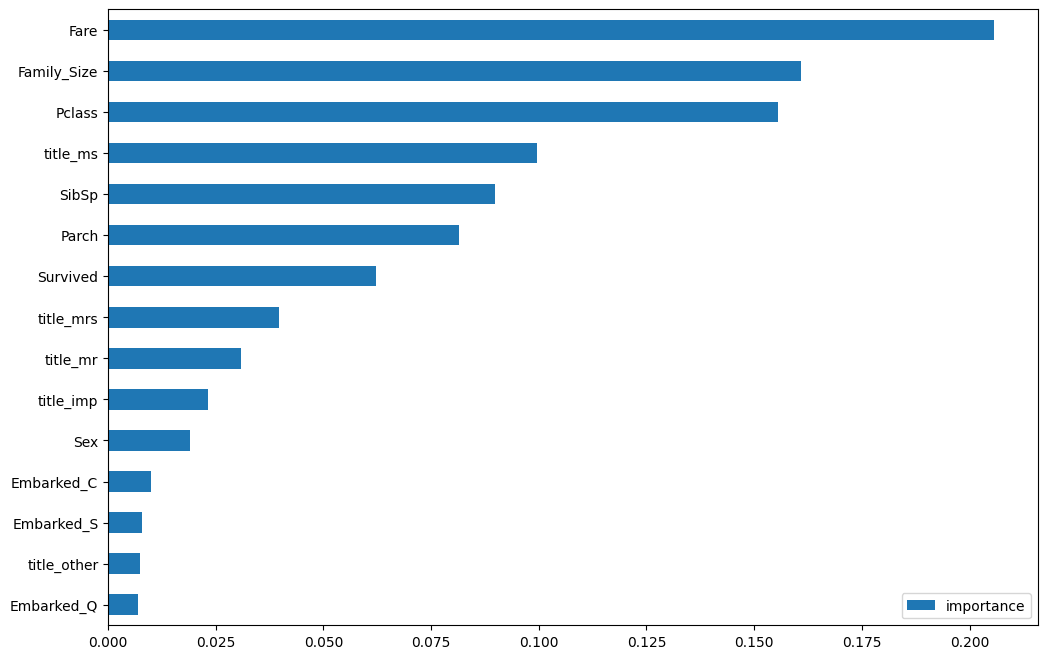

In [37]:
# pretty print feature importances sorted
feature_importances = pd.DataFrame(
    best_estimator.feature_importances_,
    index = X_train.columns,
    columns=['importance']).sort_values('importance', ascending=True)

feature_importances.plot(kind="barh", figsize=(12, 8))

In [38]:
# # plot scatter matrix for age, blue for ages_test, red for ages_train
# pd.plotting.scatter_matrix(ages_train[[*[c for c in ages_train if c != "Age"], "Age"]], alpha=0.1, figsize=(15, 10))

# plt.show()

In [39]:
# # plot scatter matrix for age, blue for ages_test, red for ages_train
# pd.plotting.scatter_matrix(ages_test[[*[c for c in ages_test if c != "Age"], "Age"]], alpha=0.4, figsize=(15, 10))

# plt.show()

In [45]:
ages_test

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Family_Size,title_imp,title_mr,title_mrs,title_ms,title_other,Age
5,6,0,3,1,0,0,-0.475913,0,0,1,-0.561804,0,1,0,0,0,0.510360
17,18,1,2,1,0,0,-0.384475,1,0,0,-0.561804,0,1,0,0,0,0.209088
19,20,1,3,0,0,0,-0.500743,0,1,0,-0.561804,0,0,1,0,0,-0.028874
26,27,0,3,1,0,0,-0.500743,0,1,0,-0.561804,0,1,0,0,0,-0.019551
28,29,1,3,0,0,0,-0.487572,0,0,1,-0.561804,0,0,0,1,0,-0.719819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,860,0,3,1,0,0,-0.500659,0,1,0,-0.561804,0,1,0,0,0,-0.092002
861,864,0,3,0,8,2,0.754050,1,0,0,5.634773,0,0,0,1,0,-0.952059
866,869,0,3,1,0,0,-0.454940,1,0,0,-0.561804,0,1,0,0,0,-0.130033
876,879,0,3,1,0,0,-0.487238,1,0,0,-0.561804,0,1,0,0,0,-0.069003


In [44]:
ages_df[ages_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Family_Size,title_imp,title_mr,title_mrs,title_ms,title_other
5,6,0,3,1,NaN,0,0,-0.475913,0,0,1,-0.561804,0,1,0,0,0
17,18,1,2,1,NaN,0,0,-0.384475,1,0,0,-0.561804,0,1,0,0,0
19,20,1,3,0,NaN,0,0,-0.500743,0,1,0,-0.561804,0,0,1,0,0
26,27,0,3,1,NaN,0,0,-0.500743,0,1,0,-0.561804,0,1,0,0,0
28,29,1,3,0,NaN,0,0,-0.487572,0,0,1,-0.561804,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,860,0,3,1,NaN,0,0,-0.500659,0,1,0,-0.561804,0,1,0,0,0
861,864,0,3,0,NaN,8,2,0.754050,1,0,0,5.634773,0,0,0,1,0
866,869,0,3,1,NaN,0,0,-0.454940,1,0,0,-0.561804,0,1,0,0,0
876,879,0,3,1,NaN,0,0,-0.487238,1,0,0,-0.561804,0,1,0,0,0


In [53]:
ages_df["Age"] = ages_df.join(ages_test["Age"], how="left", lsuffix="_imputed").apply(lambda x: x["Age_imputed"] if np.isnan(x["Age"]) else x["Age"], axis=1)

In [55]:
ages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked_S   889 non-null    int64  
 9   Embarked_C   889 non-null    int64  
 10  Embarked_Q   889 non-null    int64  
 11  Family_Size  889 non-null    float64
 12  title_imp    889 non-null    uint8  
 13  title_mr     889 non-null    uint8  
 14  title_mrs    889 non-null    uint8  
 15  title_ms     889 non-null    uint8  
 16  title_other  889 non-null    uint8  
dtypes: float64(3), int64(9), uint8(5)
memory usage: 87.8 KB


In [57]:
titanic["Age"] = titanic.join(ages_df["Age"], how="left", lsuffix="_imputed").apply(lambda x: x["Age_imputed"] if np.isnan(x["Age"]) else x["Age"], axis=1)

In [59]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassengerId               889 non-null    int64  
 1   Survived                  889 non-null    int64  
 2   Pclass                    889 non-null    int64  
 3   Name                      889 non-null    object 
 4   Sex                       889 non-null    int64  
 5   Age                       889 non-null    float64
 6   SibSp                     889 non-null    int64  
 7   Parch                     889 non-null    int64  
 8   Ticket                    889 non-null    object 
 9   Fare                      889 non-null    float64
 10  Cabin                     202 non-null    object 
 11  Embarked                  889 non-null    object 
 12  cabin_highest_class_deck  202 non-null    object 
 13  cabin_lowest_room_num     202 non-null    float64
 14  cabin_num_

In [60]:
titanic["cabin_highest_class_deck"].value_counts()

C    59
B    45
E    33
D    33
A    15
F    12
G     4
T     1
Name: cabin_highest_class_deck, dtype: int64

In [41]:
titanic_age = pd.concat([ages_train, ages_test])

In [42]:
titanic_age

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Family_Size,title_imp,title_mr,title_mrs,title_ms,title_other
0,1,0,3,1,-0.527669,1,0,-0.500240,1,0,0,0.057853,0,1,0,0,0
1,2,1,1,0,0.577094,1,0,0.788947,0,1,0,0.057853,0,0,1,0,0
2,3,1,3,0,-0.251478,0,0,-0.486650,1,0,0,-0.561804,0,0,0,1,0
3,4,1,1,0,0.369951,1,0,0.422861,1,0,0,0.057853,0,0,1,0,0
4,5,0,3,1,0.369951,0,0,-0.484133,1,0,0,-0.561804,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,860,0,3,1,-0.092002,0,0,-0.500659,0,1,0,-0.561804,0,1,0,0,0
861,864,0,3,0,-0.952059,8,2,0.754050,1,0,0,5.634773,0,0,0,1,0
866,869,0,3,1,-0.130033,0,0,-0.454940,1,0,0,-0.561804,0,1,0,0,0
876,879,0,3,1,-0.069003,0,0,-0.487238,1,0,0,-0.561804,0,1,0,0,0


In [345]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,cabin_num_cabins,Embarked_S,Embarked_C,Embarked_Q,Family_Size,title_imp,title_mr,title_mrs,title_ms,title_other
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.527669,1,0,A/5 21171,-0.500240,...,NaN,1,0,0,0.057853,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.577094,1,0,PC 17599,0.788947,...,1.0,0,1,0,0.057853,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.251478,0,0,STON/O2. 3101282,-0.486650,...,NaN,1,0,0,-0.561804,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.369951,1,0,113803,0.422861,...,1.0,1,0,0,0.057853,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,0.369951,0,0,373450,-0.484133,...,NaN,1,0,0,-0.561804,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",1,-0.182430,0,0,211536,-0.384475,...,NaN,1,0,0,-0.561804,0,0,0,0,1
885,888,1,1,"Graham, Miss. Margaret Edith",0,-0.734812,0,0,112053,-0.042213,...,1.0,1,0,0,-0.561804,0,0,0,1,0
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,-0.174084,...,NaN,1,0,0,1.297169,0,0,0,1,0
887,890,1,1,"Behr, Mr. Karl Howell",1,-0.251478,0,0,111369,-0.042213,...,1.0,0,1,0,-0.561804,0,1,0,0,0
